In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv("Mall.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

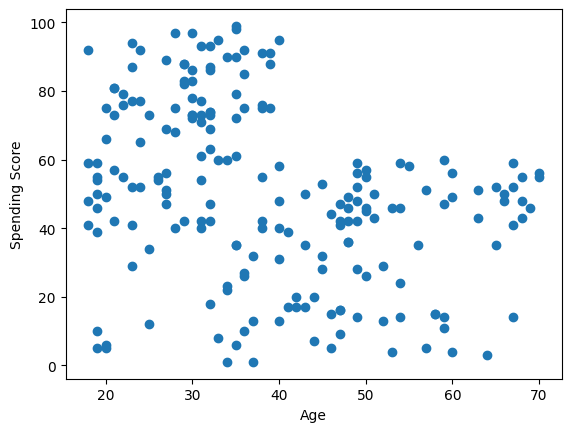

In [7]:
plt.scatter(df['Age'], df['Spending Score (1-100)'])
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.show()

Text(0, 0.5, 'Annual Income')

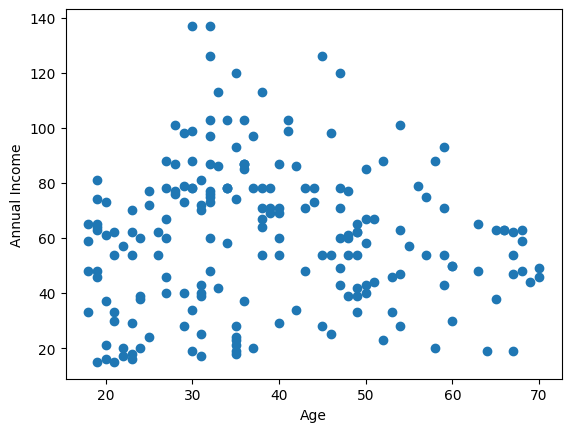

In [ ]:
plt.scatter(df['Age'], df['Annual Income (k$)'])
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")

Text(0, 0.5, 'Annual Income (k$)')

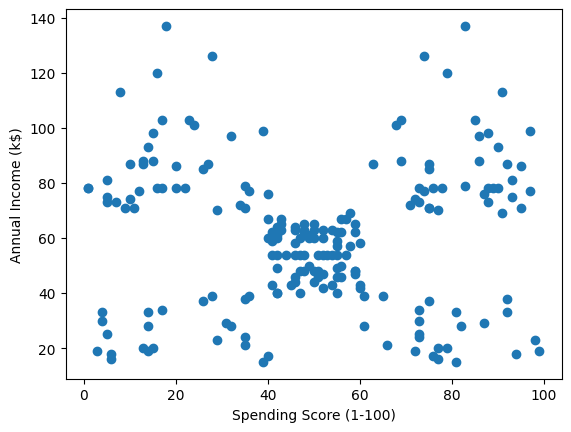

In [10]:
plt.scatter(df['Spending Score (1-100)'], df['Annual Income (k$)'])
plt.xlabel("Spending Score (1-100)")
plt.ylabel("Annual Income (k$)")

In [11]:
relevant_cols = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
customer_df = df[relevant_cols]
customer_df

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(customer_df)

StandardScaler()

In [13]:
scaled_data = scaler.transform(customer_df)
scaled_data

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

In [18]:
from sklearn.cluster import KMeans

def find_best_clusters(df, maximum_K):
    inertia_values = []  
    k_values = []        
    
    for k in range(2, maximum_K):
        kmeans_model = KMeans(n_clusters=k)  
        kmeans_model.fit(df)
        
        inertia_values.append(kmeans_model.inertia_)  
        k_values.append(k) 
    
    return k_values, inertia_values  

In [19]:
clusters_centers, k_values = find_best_clusters(scaled_data, 12)

In [21]:
def generate_elbow_plot(clusters_centers, k_values):
    figure = plt.subplots(figsize = (12, 6))
    plt.plot(k_values, clusters_centers, 'o-', color='orange')
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Cluster Intertia")
    plt.title("Elebow Plot of KMeans")
    plt.show()

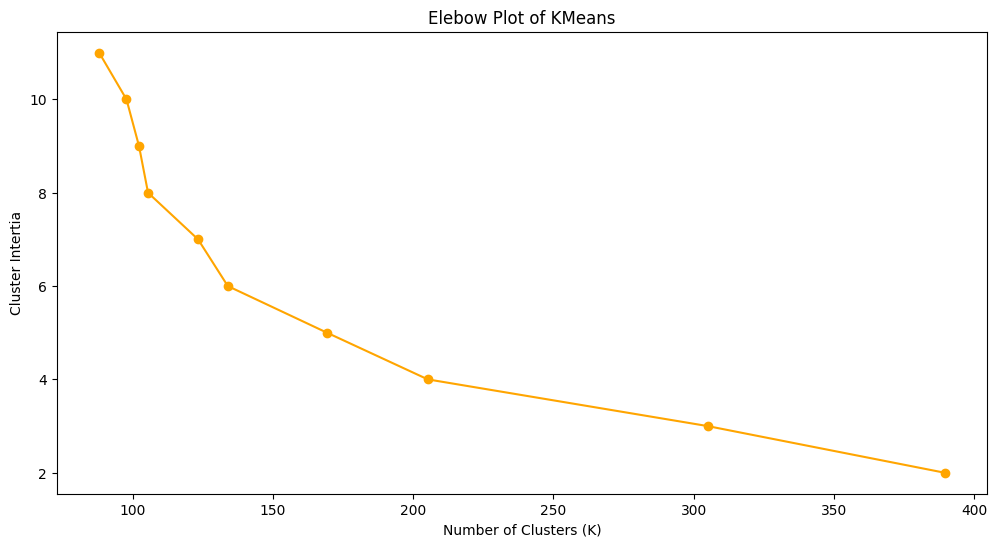

In [24]:
generate_elbow_plot(clusters_centers,k_values)

In [22]:
kmeans_model = KMeans(n_clusters=5)
kmeans_model.fit(scaled_data)

KMeans(n_clusters=5)

In [23]:
df["clusters"] = kmeans_model.labels_
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,Male,19,15,39,3
1,2,Male,21,15,81,0
2,3,Female,20,16,6,3
3,4,Female,23,16,77,0
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,4
197,198,Male,32,126,74,2
198,199,Male,32,137,18,4


In [32]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)  
df['Cluster'] = kmeans.fit_predict(df[['Spending Score (1-100)', 'Annual Income (k$)']])

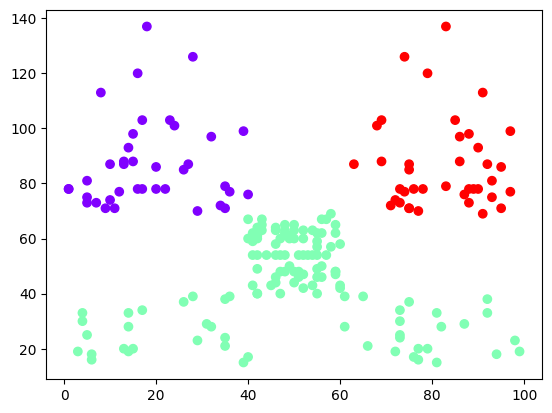

In [33]:
plt.scatter(df["Spending Score (1-100)"], df["Annual Income (k$)"], c=df['Cluster'], cmap='rainbow')